# Klassifikation

## Überblick

Bei der Klassifikation geht es darum Kategorien zu Objekten zuzuweisen. Betrachten wir das Beispiel in {numref}`fig-class-example`. Das obere Bild zeigt einen Wal vor einem Eisberg. Das unsere Bild zeigt einen Bär in einem Wald. Beides erkennt man als menschlicher Betrachter instinktiv ohne darüber nachzudenken. Das Ziel der Klassifikation ist es diese Kategorisierung von Objekten automatisch durch eine Algorithmus durchführen zu lassen. Eine wichtige Einschränkung gegebenüber unserer menschlichen Kategoriesierung ist, das wir nur mit festen und im vorfeld festgelegten Kategorien arbeiten können Im Beispiel in {numref}`fig-class-example` könnten diese Kategorien zum Beispiel "Wal", "Bär" und "Sonstiges" sein. Die Klassifikationsaufgabe wäre dann die Zuweisung einer dieser drei Kategorien zu den Bilden. Die Kategorien, in die die Objekte eingeteilt werden, nennt man auch *Klassen*. 

```{figure} images/classification_example_german.png
---
width: 600px
name: fig-class-example
---
Zuweisung der Kategorien Wal und Bär zu Bildern. 
```

Etwas abstrakter können wir uns die Klassifikation wie in Abbildung {numref}`fig-class-abstract` vorstellen. Wir haben also Objekte für die wir ein *Konzept* kennen. Wenden wir unser Konzept auf die Objekte an, bekammen wir die Einteilung in Klassen. Wir kennen also ein Konzept das Wale beschreibt, welches wir auf das Bild wenden können um die Klasse zu bestimmen. 

```{figure} images/classification_concept_german.png
---
width: 600px
name: fig-class-abstract
---
Abstraktes Konzept der Klassifikation
```

Das Ziel von Klassifikationsalgorithmen ist es eine *Hypothese* aus den Daten abzuleiten, mit der man die Klasse von Objekten anhand der Merkmale bestimmen kann. Als Beispiel betrachten wir das Bild des Wals durch die Merkmale ({numref}`fig-hypothesis`). Über diese Merkmale könnte man auf folgende Hypothese kommen: *Objekte mit Flossen, die eine ovale Form haben, welche oben schwarz und unten weiß sind und die sich vor einem blauen Hintergrund befinden, sind Wale*. Diese Hypothese mag zwar nicht in jedem Fall richtig sein, sie ist aber eine relativ gute Beschreibung, mit der man viele Wale (bzw. Orcas) richtig erkennt. Fehler würde man zum Beispiel machen, wenn es ein U-Boot mit einer ähnlichen Farbwal gäbe. Die Art der Hypothese, zum Beispiel ob es sich um einen logischen Ausdruck oder eine beliebige mathematische Funktion handelt, hängt von der Wal des Algorithmus ab. Die Hypothese selbst wird vom Lernalgorithmus automatisch aus den Daten bestimmt. 

```{figure} images/hypothesis_german.png
---
width: 600px
name: fig-hypothesis
---
Abstraktes Konzept der Klassifikation
```

Formal haben wir eine Menge von Objekten $O = \{object_1, object_2, ...\}$ welche möglicherweise unendliche viele Elemente enthält. Außerdem haben wir eine Repräsentation der Objekte als Instanzen im Merkmalsraum $\mathcal{F} = \{\phi(o): o \in O\}$ und eine endliche Anzahl von Klassen $C = \{class_1, ..., class_n\}$. Die Klassifikation wird durch ein *Zielkonzept* (engl. *target concept*) beschrieben, welches die Objekte auf ihre Klassen abbildet, also

$$h^*: O \to C.$$
 
Das Zielkonzept ist die wahre Klasse der Objekte, also eine perfekte Zuweisung von Objekten zu Klassen. Im normalfall ist keine mathematische Beschreibung des Zielkonzepts bekannt. Es gibt zum Beispiel keine mathematische Beschreibung zur Klassifikation von Bildern in Walbilder und Bärenbilder. Die *Hypothese* bildet die Merkmale auf die Klassen ab, also

$$h: \mathcal{F} \to C.$$

Die Hypothese wird vom Klassifikationsalgorithmus so bestimmt, dass sie eine gute Approximation des Zielkonzept ist, also

$$h^*(o) \approx h(\phi(o)).$$

Eine Variante der Klassifikation ist die Berechnung von *Scores* für jede Klasse $c \in C$. In diesem Fall haben wir Scoring-Funktionen

$$h_c': \mathcal{F} \to \mathbb{R}$$

für jede Klasse. Die Scores sind ähnlich zum Soft Clustering: Anstatt das wir alle Instanzen genau einer Klasse zuweisen, bestimmen wir eine Wert für jede Klasse, den wir dann für die Entscheidungsfindung nutzen können. Im Normalfall wird dann die Klasse zugewiesen, die den höchsten Score hat. Wir haben also

$$h(x) = \arg\max_{c \in C} h_c'(x)$$ 

für $x \in \mathcal{F}$. Oft handelt es sich bei den Scores um Wahrscheinlichkeitsverteilungen, so dass der Score für jeder Klasse im Intervall $[0,1]$ liegt und die Summe der Scores aller Klasse 1 ergibt. In diesem Fall geben die Scores die Wahrscheinlichkeit an, dass ein Objekt zu einer bestimmten Klasse gehört. 

## Binäre Klassifikation und Grenzwerte

Ein häufig betrachter Spezialfall der Klassifikation ist die binäre Klassifikation bei der es genau zwei Klassen gibt. Auch wenn es sich hierbei um eine starke Einschränkung handelt, gibt es viele Probleme die man mit Hilfe von binärer Klassifikation lösen kann. Beispiele hierfür sind die Vorhersage ob ein Schuldner einen Kredit abbezahlen kann, ob es sich bei einer Transaktion um Kreditkartenbetrug handelt, oder ob eine Email Spam ist.

Bei der binären Klassifikation nennt man eine Klasse *Positiv* und die andere *Negativ*. Da es nur die zwei Klassen $C = \{positive, negative\}$ gibt, kann man das berechnen der Scores unter der Annahme das es sich bei den Scores um Wahrscheinlichkeiten handelt vereinfachen. Es gilt dann nämlich

$$h_{negative}'(x) = 1-h_{positive}'(x)$$

da die Summer der Wahrscheinlichkeiten 1 ergibt. Entsprechend reicht es auch nur die Scoring-Funktion für die positive Klasse zu berechnen und wir nutzen die Notation $h'(x) = h_{positive}'$ für die binäre Klassifikation. Jetzt können wir auch statt einfach die Klasse mit der höchsten Wahrscheinlichkeit auszuwählen einen *Grenzwert* $t \in [0,1]$ festlegen, der für die positive Klasse erreicht sein muss. Wenn $h'(x) \geq t$, it $x$ positiv, wenn der Score kleiner als der Grenzwert ist, ist $x$ negativ. Es gilt also

$$h_t(x) = \begin{cases}\text{positive} & \text{wenn}~h'(x) \geq t \\ \text{negative} & \text{wenn}~h' < t\end{cases}$$

Warum Grenzwerte und Scoring-Funktionen relevant für die Klassifikation sind kann man sich gut an einem Beispiel verdeutlichen. Das Histogram unten zeigt fiktive Daten von Scores einer Spamerkennungs Klassifikation bei der positive Instanzen kein Spam sind. 

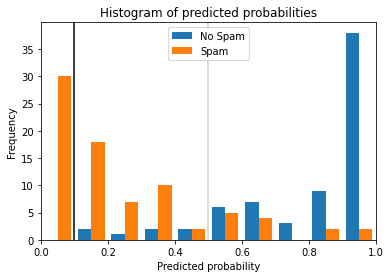

In [31]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# generate sample data
X, y = make_blobs(n_samples=300, centers=2, center_box=(0, 1),
                  cluster_std=0.3, random_state=1)

# split the data into 50% training data and 50% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# predict scores with a random forest
classifier = RandomForestClassifier(random_state=0)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

fig, ax = plt.subplots()
ax.hist([y_score[y_test==1,1], y_score[y_test==0,1]], bins=10, label=['No Spam', 'Spam'])
ax.set_xlim(0,1)
ax.set_title('Histogram of predicted probabilities')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('Frequency')
ax.axvline(0.5, color='lightgray')
ax.axvline(0.1, color='black')
plt.legend(loc="upper center")
plt.show()

Die organen Balken zeigen die Scores von Spam-Emails, die blauen Balken die Scores aller regulären Emails. Wenn man keinen Grenzwert auswählt, würde man einfach die Klasse mit dem höchsten Score vorhersagen. Dies ist Äquivalent zu einem Grenzwert von 0,5, dargestellt durch die graue vertikale Linie. In diesem Beispiel würden wir also die meisten Emails richtig vorhersagen, aber auch eine Emails als Spam markieren, obwohl sie eigentlich kein Spam sind, und auch einige Emails nicht als Spam markieren, obwohl es sich um Spam handelt. Es handelt sich hier um unterschiedliche Arten von Fehlern, die für diesen Anwendungsfall nicht gleichwertig sind. Auch wenn Spam nervig ist, ist das löschen einer Email nicht sehr aufwändig, es sei denn man hat es mit hunderten oder gar tausenden von Spam-Emails zu tun. Wenn jedoch auch nur eine einzige wichtige Email ausversehen als Spam markiert und der Empfänger diese Email dadurch nicht angezeigt bekommt, kann dies große negative Konsequenzen haben. Dieses Problem können wir durch die Auswahl eines geeigneten Grenzwerts lösen. Die schwarze Linie markiert einen Grenzwert von 0,1. Mit diesem Grenzwert würde man nur Spam-Emails als solche Kennzeichnen. Als folge würde man zwar auch mehr Spam-Emails nicht erkennen, aber es würden keine regulären Emails durch den Spamfilter abgefangen. Dies zeigt das die Wahl eines geeigneten Grenzwerts den Unterschied zwischen einer guten Lösung für einen Anwendungsfall und einem ungeeignetem Modell machen kann. 

## Gütemaße

Eine Kernfrage der Klassifikation ist wie gut die Hypothese $h$ das Zielkonzept $h^*$ approximiert. In der Regel erreicht man keine perfekte Lösung, es gibt also Instanzen die falsch durch die Hypothese klassifiziert werden. Das obige Spamerkennungsbeispiel zeigt bereits, das es unterschiedliche Arte von Fehlern gibt, die wir mit den Gütemaßen berücksichtigen müssen. 

Die Grundlage für die Bewertung der Güte von Klassifikationsalgorithmen sind Testdaten. Hierzu wird die Hypothese auf die Merkmale der Testdaten angewandt. Anschließend kann man die Vorhersageergebnisse mit der wahren Klasse vergleichen. Die folgende Tabelle zeigt dies am Beispiel der Wal- und Bärenbilder. 

| Form     | Farbe oben | Farbe unten | Hintergrundfarbe | Flossen | Klasse | Vorhersage |
|----------|------------|-------------|------------------|---------|--------|------------|
| Oval     | Schwarz    | Weiß        | Blau             | Ja      | Wal    | Wal        |
| Rechteck | Braun      | Braun       | Grün             | Nein    | Bär    | Wal        |
| ...      | ...        | ...         | ...              | ...     | ...    | ...        |

Due erste Instanz wird korrekt vorhersagt, bei der zweiten Instanz macht unsere fiktive Hypothese einen Fehler. Wenn es tausende, oder sogar Millionen von Instanzen in den Testdaten gibt, ist es nicht machbar die Ergebnisse anhand einer solchen Tabelle auszuwerten. Stattdessen brauchen wir eine kompaktere Darstellung der Güte der Ergebnisse um die Vorhersagen mit den wahren Klassen zu vergleichen. 

### Die Confusion Matrix

Das wichtigste Werkzeug für die Analyse der Qualität von Hypothesen ist die *Confusion Matrix*, eine tabellenartige Beschreibung der Häufigkeiten mit denen die Hypothese richtig liegt, bzw. Fehler macht, also verwirrt (engl. *confused*) ist. Die Confusion Matrix für unser Bildklassifikationsbeispiel könnte zum Beispiel so aussehen. 

<table>
    <tr><td></td><td colspan=4><b>Wahre Klasse</b></td></tr>
    <tr><td rowspan=4><br><br><b>Vorhersage</b></td><td><td><b>Wal</b></td><td><b>Bär</b></td><td><b>Sonstiges</b></td></tr>
    <tr><td><b>Wal</b></td><td>29</td><td>1</td><td>3</td></tr>
    <tr><td><b>Bär</b></td><td>2</td><td>22</td><td>13</td></tr>
    <tr><td><b>Sonstiges</b></td><td>4</td><td>11</td><td>51</td></tr>
</table>

Im wesentlichen zählt die Confusion Matrix wir oft Instanzen einer bestimmte Klasse als welche Klasse vorhergesagt werden. Man sieht zum Beispiel wie oft Wale als Wale vorhergesagt werden und wie oft sie stattdessen als Bären oder Sonstiges klassifiziert werden. Die Spalten zeigen die wahren Werte der Instanzen, also das Zielkonzept. Die Zeilen zeigen die Vorhersagen, also die Hypothese. In unserem Beispiel haben wir 35 Bilder von Walen. Dies ist die Summe der Werte in der ersten Spalte. 29 diese Walbilder werden richtig klassifiziert, 2 werden fehlerhaft als Bären klassifiziert und 4 werden fehlerhaft als Sonstiges klassifiziert. Wir bekommen mit Hilfe der Confusion Matrix also ein genaues statistische Informationen darüber, wie die Instanzen einer Klasse klassifiziert werden. Die Werte auf der Diagonalen sind die richtigen Vorhersagen, die anderen Werte sind die Fehler. 

### Die Binäre Confusion Matrix

Die binäre Confusion Matrix ist der Spezialfall der Confusion Matrix für binäre Klassifikationsprobleme. Im Allgemeinen sieht die binäre Confusion Matrix wie folgt aus:

<table>
    <tr><td></td><td colspan=3><b>Wahre Klasse</b></td></tr>
    <tr><td rowspan=3><br><br><b>Vorhersage</b></td><td><td><b>Positiv / True</b></td><td><b>Negativ / False</b></td></tr>
    <tr><td><b>Positiv / True</b></td><td>Richtig Positiv / True Positive (TP)</td><td> Falsch Positiv / False Positive (FP)</td></tr>
    <tr><td><b>Negativ / False</b></td><td>Falsch Negativ / False Negative (FN)</td><td> Richtig Negativ / True Negative (TN)</td></tr>
</table>

Wir bekommen also abhängig davon ob der wahren Klasse und der Vorhersage die Anzahl der *richtig positiven* (engl. *true positive* / TP), *richtig negativen* (engl. *true negative* / TN), *falsch positiven* (engl. *false positive* / FP) und *falsch negativen* (*false negatives* / FN) Ergebnisse. Die binäre Confusion Matrix ist auch jenseits des maschinellen Lernens verbreitet, zum Beispiel in der Medizin zur Bewertung der Qualität von Tests. Aus der Medizin kommen auf die Begriffe des *Fehlers 1. Art* (engl. *type I error*) und *Fehlers 2. Art* (engl. *Type II Fehler*). Der Fehler 1. Art misst die Anzahl der falsch positiven. Das könnte zum Beispiel bedeuten, dass das Ergebnis eine Antigentests auf eine bestimmte Krankheit fälschlicherweise ein positives Ergebnis liefert, obwohl der Patient nicht erkrankt ist. Der Fehler 2. Art misst die Anzahl der falsch negativen. Dies würde zum Beispiel bedeuten, dass eine Krankheit von einem Antigentest übersehen wird, ob ein Patient erkrankt ist. 

### Binäre Gütemaße

Mit Hilfe der binären Confusion Matrix können wir Gütemaße defininerne, welche die Güte einer Hypothese durch eine einzelne Zahl basierend auf einem statistischen Kriterium zusammenfassen. Es gibt viele derartige Gütemaße, die alle unterschiedliche Aspekte der Güte messen. Die folgende Tabelle listet elf derartige Gütemaße. 

| Metric | Description | Definition |
|--------|-------------|------------|
| True positive rate, recall, sensitivity | Prozentsatz der positiven Instanzen, die korrekt klassifiziert werden. | $TPR = \frac{TP}{TP+FN}$ |
| True negative rate, specificity | Prozentsatz der negativen Instanzen, die korrekt klassifiziert werden. | $TNR = \frac{TN}{TN+FP}$ |
| False negative rate | Prozentsatz der positiven Instanzen, die fehlerhaft als negativ klassifiziert werden. | $FNR = \frac{FN}{FN+TP}$ |
| False positive rate | Prozentsatz der negativen Instanzen, die fehlerhaft als positiv klassifiziert werden. | $FPR = \frac{FP}{FP+TN}$ |
| Positive predictive value, precision | Prozentsatz der positiven Vorhersagen, die korrekt sind. | $PPV = \frac{TP}{TP+FP}$ |
| Negative predictive value | Prozentsatz der negativen Vorhersagen, die korrekt sind. | $NPV = \frac{TN}{TN+FN}$ |
| False discovery rate | Prozentsatz der positiven Vorhersagen, die fehlerhaft sind und eigentlich negativ sein sollten. |$FDR = \frac{FP}{TP+FP}$ |
| False omission rate | Prozentsatz der negativen Vorhersagen, die fehlerhaft sind und eigentlich positiv sein sollten. | $FOR = \frac{FN}{FN+TN}$ |
| Accuracy | Prozentsatz der korrekten Vorhersagen.  | $accuracy = \frac{TP+TN}{TP+TN+FP+FN}$ |
| F1-Score | Harmonisches Mittel von $recall$ und $precision$. | $F_1 = 2\cdot\frac{precision \cdot recall}{precision+recall}$ |
| Matthews correlation coefficient (MCC) | Korrelation zwischen den Vorhersagen und den wahren Klassen. | $MCC = \frac{TP\cdot TN - FP\cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$ |

Da es so viele Gütemaße gibt, stellt sich die Frage welche man benutzen sollte. Die Auswertung von allen elf Gütemaßen gleichzeitg ist nicht sinnvoll. Viele Gütemaße sind stark miteinander korreliert und sie werden alle basierend auf den selben vier Werten (TP, FP, TN, FN) berechnet. Stattdessen sollte man die Logik hinter der Definition der Güßemaße nachvollziehen um zu verstehen welche für eine bestimmten Anwendungsfall geeignet sind. 

Die ersten vier Gütemaße berechnen den Anteil von richtigen, bzw. falschen Vorhersagen in Relation zu den wahren Werten. Hiermit kann man Fragen der Form "wie viele positive/negative Instanzen sind korrekt klassifiziert" beantworten. Die Kombination aus TPR und TNR ist sehr wichtig, da diese zwei Fragen beantworten, die für viele Anwendungsfälle von elementarer Bedeutung sind: Wie viele positive und wie viele negative Instanzen werden korrekt gefunden? Entsprechend sind Gütemaße gut geeignet um den Fehler 1. Art und den Fehler 2. Art zu schätzen. Die FPR und die FNR sind die Gegenstücke zur TNR und TPR und lassen sich auch direkt aus diesen berechnen als $FPR=1-TNR$, bzw. $FNR=1-TPR$. 

Die nächsten vor Gütemaße berechnen den Anteil von richtigen, bzw. falschen Vorhersagen in Relation zu den Vorhersagen. Hiermit kann man Fragen der Form "wie viele ositive/negative Vorhersagen sind richtig klassifiziert" beantworten. Der unterschied zu den ersten vier Gütemaßen liegt in Bezugsgröße, die hier nicht die wahren Klassen sondern die Vorhersagen sind. Ansonsten sind die Gütemaße ähnlich zu den ersten vier Gütemaßen. 

Eine gemeinsame Eigenschaft der ersten acht Gütemaße ist das sie niemals alleine benutzt werden. Mit andern Worten bedeutet dass, das man nie nur eines dieser Gütemaße als Optimierungskriterium wählen sollte. Der Grund ist, dass diese Metriken jeweils nur eine Spalte, bzw. Zeile der Confusion Matrix berücksichtigen. Wenn man zum Beispiel die TPR berechnet, werden hierfür nur die Werte aus der ersten Spalte der Confusion Matrix verwendet, die zweite Spalte wird ignoriert. Als konsequenz sind *triviale Hypothesen* ausreichend um ein optimales Ergebnis in nur eines des Gütemaße zu erreichen. Man nennt eine Hypothese trivial, wenn sie immer die selbe Klasse vorhersagt, für alle Instanzen. Ein Beispiel für eine triviale Hypothese ist $h^+(x) = true$ für alle $x \in \mathcal{F}$. Mit dieser Hypothese hätte man einen perfekten Wert für die FPR von 1. Die Hypothese ist jedoch nicht hilfreiche, da sie nichts über die Daten selbst aussagt. Um das zu vermeiden, muss man mehrere Kriterien verwenden, so dass mindestens drei Werte aus der Confusion Matrix verwendet werden. Mit $h+$ wären die TNR zum Beispiel 0, also so schlecht es geht. Mit der Kombination aus TPR und TNR verhindert man also, das man mit einer trivialen Hypothese ein optimales Ergebnis bekommt. 

Es gibt auch Gütemaße die nicht nur einzelne Aspekte der Güte betrachten, sondern die Güte als ganzes und daher als einziges Kriterium verwendet werden können. Die letzten drei Gütemaße sind Beispiele hierfür. Diese Metriken nutzen die komplette Confusion Matrix um die Güte einer Hypothese zu berechnen. Die Accuracy müsst den Anteil der Vorhersagen, die richtig sind. Dies ist ähnlich zu den ersten vier Gütemaßen, mit dem Unterschied das beide Klassen gleichzeitig betrachtet werden. Der Nachteil der Accuracy ist, dass sie im Fall von *Class Level Imbalance* zu irreführend sein kann. Man spricht von Class Level Imbalance, wenn es deutlich mehr Instanzen aus einer Klasse, als aus der anderen gibt. Wenn zum Beispiel 95% der Instanzen positiv sind, erreicht würde unsere triviale Hypothese $h^+$ bereits eine Accuracy von 95% erreichen. Dieser sehr gute Wert ist aber irreführend, da er nicht abbildet das alle negativen Instanzen falsch klassifiziert werden. Daher sollte man die Accuracy nur mit bedacht einsetzen und sicher stellen dass es etwa gleich viele Instanzen für alle Klassen gibt. 

Der F1-Score ist das *harmonische Mittel* aus dem TPR/Recall und dem PPV/Precision. Der F1-Score berücksichtigt also den Anteil der positiven Instanzen, die korrekt Klassifiziert sind und den Anteil der positiven Vorhersagen, die korrekt sind. Das harmonische Mittel ist eine alternative zum arithmetischen Mittel, mit dem man Verhältnisse gut Mitteln kann. Beim harmonischen Mittel wird der niedrigere Wert höher gewichtet. Der F1-Score basiert auf der Idee das es einen Trade-Off zwischen Recall und Precision gibt. Um den Recall zu erhöhen, müssen wir mehr Instanzen als positiv klassifizieren. Hierdurch bekommen wir in der Regel auf mehr falsch positive Instanzen, da es Fehler gibt. Durch den höheren Anteil an falsch positiven Ergebnissen reduziert sich die Precision. Da durch das harmonische Mittel der kleinere Wert überproportional in der Berechnung berücksichtig wird, strebt eine Optimierung des F1-Scores ähnlliche Werte für Recall und Precision an. 

Die letzte Metrik in der obigen Tabelle ist MCC, welcher die direkte Korrelation zwischen den wahren Werten und den Vorhersagen berechnet. Im wesentlichen misst MCC wie der Anteil der richtig positiven und richtig negativen Vorhersagen mit dem erwarteten Ergebnis korreliert ist. Der MCC ist robust gegen die Class Level Imbalance und liefert im Allgemeinen eine gute Schätzung der Güte. Der Nachteil des MCC ist, dass es keine einfache Interpretation gibt, die auch Laien zugänglich ist. Alle anderen Gütemaße kann man in wenigen Sätzen natürlicher Sprache erklären, für MCC gibt es keine ähnlich zugängliche Erklärung. Hierdurch ist es auch schwerer die Werte von MCC einzuordnen. Hinzu kommt, dass die Werte von MCC im Intervall nicht im Intervall $[0,1]$ liegen, sondern in $[-1, 1]$ da es sich im ein Korrelationsmaß handelt. Ein hoher negativer Wert bedeutet, dass die Hypothese das Gegenteil von erwarteten Ergebnissen vorhersagt. Je nach Kontext, können hohe negative Werte also auch gut sein, da man theorisch einfach alle Vorhersagen invertieren kann. Zusammenfassend können wir also sagen, dass MCC ein sehr robustes Gütemaß ist, die interpretation der Ergebnisse erfordert aber etwas Übung und Expertenwissen. 

### Die Receiver Operator Characteristic (ROC)

Die oben diskutierten Gütemaße basieren alle aus der Confusion Matrix. Ein Nachteil der Confusion Matrix ist, dass diese die Scores nicht berücksichtigt. Man kann die Confusion Matrix für eine Scoring-Funktion $h'$ nur für einen festen Grenzwert $t$ berechnen. Wie sich die Confusion Matrix für verschiedene Werte von $t$ verändert kann man nicht ablesen. Hierzu kann man *Receiver Operator Characteristic* (ROC) Kurven einsetzen. Eine ROC Kurve representiert alle möglichen Werte für TPR und FPR, die für eine Scoring-Funktion $h'$ mit beliebigen Grenzwerten $t \in [0,1]$ erreichen kann. Die ROC Kurve von unserem Spamerkennungsbeispiel sieht wie folgt aus. 

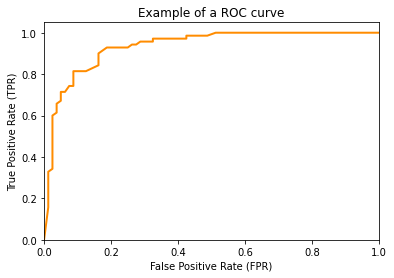

In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, t = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
ax.set_title('Example of a ROC curve')
plt.show()

Die ROC Kurve zeigt die FPR auf der x-Achse und die TPR auf der y-Achse an. Man sieht alle möglichen Verhältnisse von FPR und TPR die man mit verschiedenen Grenzwerten erreichen kann. Da eine Hypothese eine hohe TPR und eine niedrige FPR erreichen sollte, liegt die optimale Güte in der oberen linken Ecke der ROC Kurve, wo die FPR 0 und die TPR 1 ist. Dies wäre ein perfektes Ergebnis ohne Fehlklassifikationen. Die ROC Kurve ist ein gutes Werkzeug um eine gute Kombination aus TPR und FPR für einen Anwendungsfall auszuwählen. Wenn wir zum Beispiel eine TPR von mindestens 0,8 erreichen wollen, können wir sehen das wir hierfür eine FPR von 0,05 in kauf nehmen müssen. Dies ist in der folgenden Grafik mit einem Kreis markiert. 

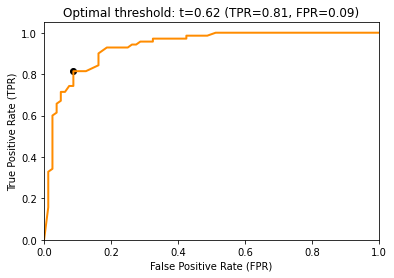

In [33]:
index = 0
while tpr[index]<0.8:
    index += 1

# Plot ROC Curve
fig,ax = plt.subplots()
ax.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.scatter(fpr[index], tpr[index], color='black', marker='o')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
ax.set_title('Optimal threshold: t=%.2f (TPR=%.2f, FPR=%.2f)' % (t[index], tpr[index], fpr[index]))
plt.show()

### Area Under the Curve (AUC)

Wir können dir ROC Curve auch benutzen um ein Gütemaß zu definieren, in dem wir die *Fläche unter der Curve* (engl. *Area Under the Curve*, AUC) messen. Die idee ist einfach: Wenn der optimale Wert der ROC Curve in der oberen linken Ecke ist, ist die Fläche in diesem Fall 1. Je kleiner die Fläche unter der Kurve, desto niedriger die Werte von möglichen Kombinationen der TPR und FPR, was bedeutet das wir schlechtere Ergebnisse haben, unabhängig von einem konkreten Grenzwert $t$. Wenn wir also das Integral der ROC Kurve berechnen, können wir damit schätzen wie gut eine Hypothese ist. Daher auch der Name dieses Gütemaßes, als die Fläche unter der Kurve. 

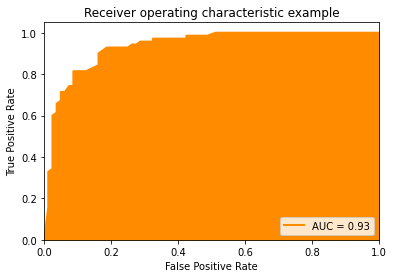

In [35]:
# Plot ROC Curve with AUC
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='darkorange',
         lw=lw, label='AUC = %0.2f' % roc_auc)
ax.fill_between(fpr, 0, tpr, color='darkorange')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Je näher der Wer von AUC an 1 ist, desto besser ist die Güte der Hypothese. Was die Interpretation angeht, hat AUC aber ein ähnliches Problem wie MCC: Während ein Wert von 1 optimal ist, ist der schlechteste Werte nicht etwa die 0, sondern die 0,5. Bei der 0 hätte man eine FPR von 1 und eine TPR von 0. Wenn man jetzt das Ergebnis invertiert, hat man eine perfekte Klassifikation. Eine Fläche von 0,5 wiederum bekommt man durch die Diagonale auf der $TPR=FPR$ gilt. Wenn TPR und FPR gleich groß sind, heißt das aber nichts anderes, als das man so gut ist wie der Zufall. Daher sind Werte von AUC besser, je weiter sie von 0,5 entfernt sind. Falls die Werte jedoch unter 0,5 liegen, sollte man rausfinden warum die Hypothese das Gegenteil der wahren Werte vorhersagt. 

### Micro und Macro Averages

Die bisherigen Gütemaße haben wir alle über die binäre Confusion Matrix definiert. Die Definition der Accuracy können wir ohne Probleme auf mehr als zwei Klassen verallgemeiners, da es sich um den Anteil der korrekt klassifizierten Instanzen handelt. Für MCC gibt es auch eine Erweiterung für mehr als zwei Klassen, auf die wir hier jedoch nicht näher eingehen. Für die anderen Gütemaße können wir einen Trick anwenden: Statt einer nicht-binären Confusion Matrix betrachten wir mehrere binäre Confusion Matrizen. Wie dieser Trick funktioniert, betrachten wir direkt an einem Beispiel. Hier ist noch einmal die Confusion Matrix für die drei Klassen Wal, Bär, und Sonstiges, die wir oben bereits betrachtet haben. 

<table>
    <tr><td></td><td colspan=4><b>Actual class</b></td></tr>
    <tr><td rowspan=4><br><br><b>Predicted class</b></td><td><td><b>whale</b></td><td><b>bear</b></td><td><b>other</b></td></tr>
    <tr><td><b>whale</b></td><td>29</td><td>1</td><td>3</td></tr>
    <tr><td><b>bear</b></td><td>2</td><td>22</td><td>13</td></tr>
    <tr><td><b>other</b></td><td>4</td><td>11</td><td>51</td></tr>
</table>

Wir können aus diese Matrix nun Gütemaße für die einzelnen Klassen berechnen, zum Beispiel die TPR für die Klasse Wal als

$$TPR_{whale} = \frac{TP_{whale}}{TP_{whale}+FN_{whale}}.$$

Wir betrachten also die Klasse Wal als die positive Klasse einer binären Confusion Matrix und die anderen Klassen fassen wir in einer einzigen negativen Klasse zusammen. Basierend auf diesem Konzept können wir jetzt eine Erweiterung unserer Gütemaße für eine beliebige Anzahl von Klassen definieren durch das *Macro Averaging* und das *Micro Averaging*. Ein Macro Average ist das arithmetische Mittel von eines Gütemaßes, wenn es individuell auf alle Klassen anwendet wird. Für die TPR ist das Macro Average defieniert als

$$TPR_{macro} = \frac{1}{|C|}\sum_{c \in C}\frac{TP_{c}}{TP_{c}+FN_{c}}.$$


Mit dem Micro Averaging berechnen wir die Gütemaße direkt, in dem wir die Formeln anpassen um die Summe der Werte aller Klassen zu berechnen. Für die TPR ist das Micro Average definiert als

$$TPR_{micro} = \frac{\sum_{c \in C} TP_C}{\sum_{c \in C} TP_C + \sum_{c \in C} FN_C}.$$

Ob es sinnvoller ist ein Macro oder ein Micro Average zu berechnen, hängt vom Anwendungsfall und den Daten ab. Wenn es ähnlich viele Instanzen für jede Klasse gibt, sind die Ergebnisse des Macro und Micro Averages nahezu identisch. Wenn es Class Level Imbalance in den Daten gibt, also wenn es für mindestens eine Klasse erheblich mehr oder weniger Instanzen in den Daten gibt, ist die Auswahl der Mittelungsmethode relevant. Beim Macro Average werden alle Klasse gleich gewichtet, unabhängig davon, wie viele Instanzen es in den Daten gibt. Dies liegt daran, dass die Gütemaße individuell für jede Klasse berechnet werden und anschließend ungewichtet gemittelt werden. Im Gegensatz hierzu ist der Einfluss der Klassen auf das Micro Average proportional zur Anzahl der Instanzen die es für eine Klasse in den Daten gibt: Je mehr Daten für eine Klasse vorhanden sind, desto höher der Einfluss. Dies liegt daran, dass die Formeln so angepasst werden, dass die Summen direkt über die Instanzen der Klassen gebildet werden. 

Wenn man also eine hohe Class Level Imbalance hat, sollte man das Makro Average wählen, wenn alle Klassen fair und gleichmäßig vom Gütemaß repräsentiert werden sollen. Die hat den potentiellen Nachteil, das Klassen mit wenigen Instanzen einen sehr großen Einfluss auf das Ergebnis haben könnten. Andersrum sollte man Micro Average verwenden, wenn es in Ordnung ist, dass die Ergebnisse durch die Anzahl der Instanzen pro Klasse gewichtet werden. 

### Jenseits der Confusion Matrix

Alle Gütemaße die wir betrachtet haben basieren auf der Confusion Matrix. Dies ist der übliche Ansatz um die Güte von Klassifikationsalgorithmen zu bestimmen. Die Confusion Matrix basierten Gütemaße basieren jedoch alle auf einer Annahme, die in der Regel unrealistisch ist: Alle Fehler sind gleich wichtig. In der Praxis sind einige Fehler jedoch schlimmer als andere. Das Risiko ist bei einer großen Kreditsumme zum Beispiel höher als bei einer kleineren. Wenn ein Schuldner eine große Summe nicht zurückzahlen kann, ist eine falsch positive Kreditwürdigkeit schlimmer, als bei einem kleinen Kreditsumme. Daher sollte man sich neben der Confusion Matrix auch immer Gedanken über Kosten, Nutzen, und Risiken die mit richtig positiven, falsch positiven, richtig negativen, und falsch negativen Ergebnissen verbunden sind. Man könnte zum Beispiel eine Kostenmatrix definieren, die die Gewinne und Verluste genauer aufschlüsselt. Hierdurch kann man eine bessere Kostenfunktion für den Anwendungsfall bekommen, was üblicherweise zu besseren Ergebnisse führt [^kdnuggets].

[^kdnuggets]: https://www.kdnuggets.com/2016/12/salford-costs-misclassifications.html

## Decision Surfaces

Im Folgenden verwenden wir eine visuelle Unterstützung um zu zeigen, wie verschieden Klassifikationsalgorithmen Hypothesen nutzen, um Instanzen zu klassifizieren: das *Decision Surface*. Bei einem Decision Surface handelt es sich um eine geometrische interpretation von Klassifikationsergebnissen: Der Raum der Instanzen wird in verschiedene Regionen aufgeteilt, so das jede Region die Instanzen gleich klassifiziert. Bei 2-Dimensionalen Daten heißt das, dass man farbige Flächen zeichnen kann, wobei die Farben die Klassen repräsentieren. In höherdimensionalen Räumen kann man die Decision Surfaces leider nicht gut darstellen. Wir nutzen die Kelchblattlänge und Kelchblattbreite der Irisdaten (TODO REF) als Beispieldatensatz um zu zeigen wie die Klassifikationsalgorithmen arbeiten. 

sepal length (cm)


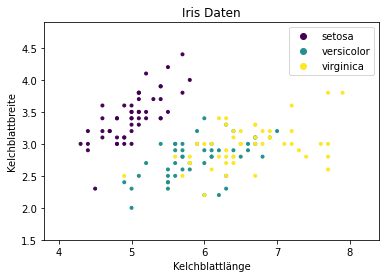

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

X, Y = load_iris(as_frame=True, return_X_y=True)
class_names = load_iris().target_names.tolist()
print(X.columns[0])
X = X.iloc[:, 0:2] # use only first two columns from iris data
X = X.rename(columns={'sepal length (cm)': 'Kelchblattlänge',
                      'sepal width (cm)': 'Kelchblattbreite'})

fig, ax = plt.subplots()
ax.set_xlim(X.iloc[:,0].min() - .5, X.iloc[:,0].max() + .5)
ax.set_ylim(X.iloc[:,1].min() - .5, X.iloc[:,1].max() + .5)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1],c=Y, marker='.')
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_title('Iris Daten')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.show()

Man erkennt das die Setosas klar von den anderen Arten der Iris getrennt sind, während sich die Versicolor und Virginica überlappen. Wir nutzen jetzt die Hintergrundfarbe um zu zeigen wie ein Decision Surface aussieht: Lila für Setosa, Türkis für Versicolor und Gelb für Virginica. Als Beispiel definieren wir selbst Regeln zu Klassifikation:

- Alle Instanzen, deren Kelchblattlänge kleiner als 5,5 ist, werden als Setosa klassifiziert. 
- Alle Instanzen, deren Kelchblattlänge zwischen 5,5 und 6 liegt, werden als Versicolor klassifiziert. 
- Alle Instanzen, deren Kelchblattlänge größer als 6 ist, werden als Virginica klassifiziert. 

Hierdurch bekommen wir folgendes Decision Surface. 

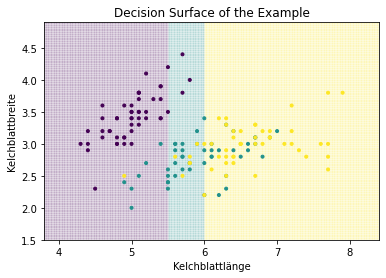

In [57]:
import numpy as np

class DummyModel:
    def fit(self, X, Y):
        pass
    
    def predict(self, X):
        result = np.ones(len(X)) # init everything as Versicolor
        result[X[:,0]<5.5] = 0 # rule for Setosa
        result[X[:,0]>6]   = 2 # rule for Virginica
        return result

def plot_decision_surface(model, X, Y, ax=None, title=None):
    h = .01 # step size in the mesh
    x_min, x_max = X.iloc[:,0].min() - .5, X.iloc[:,0].max() + .5
    y_min, y_max = X.iloc[:,1].min() - .5, X.iloc[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    model.fit(X, Y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.pcolormesh(xx, yy, Z, alpha=0.04, shading='auto')
    ax.scatter(X.iloc[:,0], X.iloc[:,1],c=Y, marker='.')
    
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    if title is None:
        title = str(model)
    ax.set_title(title)
    
plot_decision_surface(DummyModel(), X, Y, title='Decision Surface of the Example')

Die Linie, wo sich die Farben ändert, nennt man *Decision Boundary*. Die Decision Boundaries bestimmen die Struktur der Ergebnisse und sind eine wesentliche Eigenschaft von Klassifikationsalgorithmen, die sowohl praktische Auswirkungen auf die Ergebnisse, als auch ein wichtiges Hilfsmittel für die mathematische Beschreibung und Analyse ist. 

## $k$-Nearest Neighbor

Der erste Klassifikationsalgorithmus den wir betrachten ist der $k$-Nearest Neighbor Algorithmus. Dieser Algorithmus basiert auf der Idee, dass Instanzen der selben Klasse nah beieinander liegen. Diese Idee kennen wir bereits von den Clusteralgorithmen, die die Distanz als Maß für die Ähnlichkeit von Instanzen verwendet haben. Der einfachste Ansatz ist, das man einfach jede Instanz so klassifiziert, wie ihren nächsten Nachbarn. Für die Irisdaten würden mit dieser Strategie das folgende Decision Surface bekommen. 

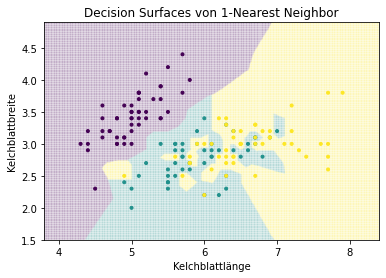

In [58]:
from sklearn.neighbors import KNeighborsClassifier

plot_decision_surface(KNeighborsClassifier(n_neighbors=1), X, Y, title="Decision Surfaces von 1-Nearest Neighbor")
plt.show()

Wir können diese Konzept auf $k$ Nachbarn erweitern um den vollständigen $k$-Nearest Neighbor Algorithmus zu erhalten. Hierfür weisen wir die Klasse als das Mehrheitsvotum der $k$ nächsten Nachbarn zu. Hierdurch ändern sich auch die Decision Surfaces für verschiedene Werte von $k$. 

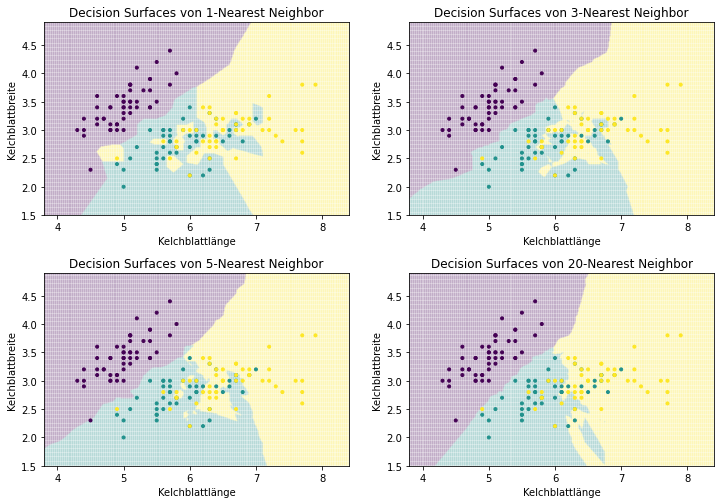

In [59]:
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_decision_surface(KNeighborsClassifier(n_neighbors=1), X, Y,
                      title="Decision Surfaces von 1-Nearest Neighbor", ax=axes[0, 0])
plot_decision_surface(KNeighborsClassifier(n_neighbors=3), X, Y,
                      title="Decision Surfaces von 3-Nearest Neighbor", ax=axes[0, 1])
plot_decision_surface(KNeighborsClassifier(n_neighbors=5), X, Y,
                      title="Decision Surfaces von 5-Nearest Neighbor", ax=axes[1, 0])
plot_decision_surface(KNeighborsClassifier(n_neighbors=20), X, Y,
                      title="Decision Surfaces von 20-Nearest Neighbor", ax=axes[1, 1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

Man erkennt keine klare Struktur für der Decision Boundaries zwischen den Decision Surfaces bei den vom $k$-Nearest Neighbor berechneten Hypothesen. Die Decision Boundaries haben viele scharfe Kanten und keine regelmäßige Struktur wie man es erwarten würde, wenn diese zum Beispiel das Ergebnis einer differenzierbaren Funktion wären. Genau dies fehlt beim $k$-Nearest Neighbor Algorithmus auch: eine mathematische Beschreibung der Hypothese, welche eine Generalisierung der Daten ist. Stattdessen haben wir einen *Instanzbasierentes* verfahren, welches die Decision Boundaries durch den direkten Vergleich von Instanzen miteinander definiert. Wenn wir betrachten wie sich das Ergebnis für größere Werte von $k$ verändert, sehen wir dass der Einfluss einzelner Datenpunkte reduziert wird. Bei $k=1$ sieht man zum Beispiel noch eine einzelne gelbe Instanz an der linken Seiten der Grafik. Hierbei handelt es sich vermutlich um einen Ausreißer der gelben Klasse (Virginica). Die Konsequenz dieses Ausreißers ist, dass es eine relativ große gelbe Region gibt, obwohl dieser Bereich eher lila oder türkis sein sollte. Bei größeren Nachbarschaftsgrößen verschwindet dieser Effekt. Andererseits bedeutet eine große Nachbarschaft auch, das Instanzen die weiter weg liegen, die Klassifikation beeinflussen. Mit $k=20$ bekommt man hierdurch eine relativ scharfe Trennung von Türkis und Gelb. Dies liegt aber nicht an den Istanzen, die direkt im Bereich der Trennung liegen, sondern an den Istnazen die weiter im Hintergrund liegen: sobald es mehr gelbe Punkte im Hintergrund gibt, bleibt die Farbe stabil gelb. Durch diese größeren Abstände kann es jedoch auch komische Effekte geben, wie man es zum Beispiel an der "türkisen Insel" in einem Ansonsten stabil gelben Bereich sieht. Das besondere hier ist, dass es in dieser Insel nicht einmal eine türkise Instanz gibt, sie entsteht also nur aufgrund von Datenpunkten die relativ weit weg liegen. 

Um den effekt der Nachbarschaftsgröße weiter zu verdeutlichen betrachen wir den Punkt (6, 3,5) im Detail. 

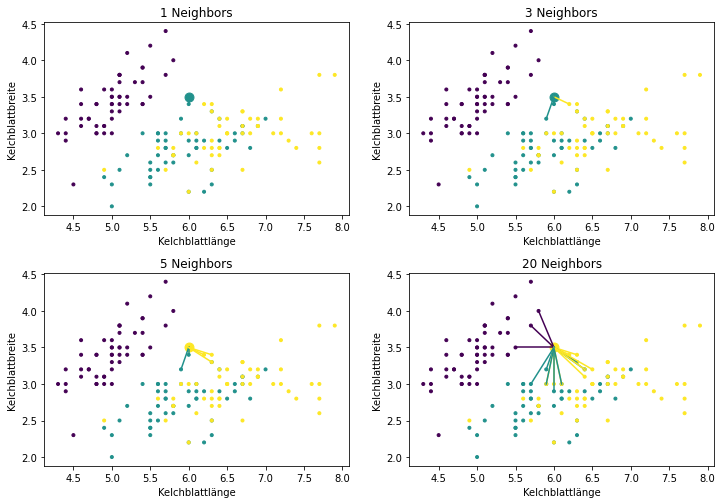

In [60]:
from sklearn.neighbors import NearestNeighbors

def plot_neighborhood(X, Y, k, pnt, ax=None):
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
    _, pnt_neighbors = nbrs.kneighbors(pnt)
    Y_pred = KNeighborsClassifier(n_neighbors=k).fit(X, Y).predict(pnt)
    if ax is None:
        plt.figure()
        ax = plt.gca()
    sc = ax.scatter(X.iloc[:,0], X.iloc[:,1],c=Y, marker='.')
    for i in range(0,k):
        pnt2 = X.iloc[pnt_neighbors[0][i]].values
        ax.plot([pnt[0][0], pnt2[0]], [pnt[0][1], pnt2[1]], color=sc.to_rgba(Y.iloc[pnt_neighbors[0][i]]))
    ax.scatter(pnt[0][0], pnt[0][1], s=80, color=sc.to_rgba(Y_pred[0]))
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    ax.set_title('%i Neighbors' % k)
    
pnt = [[6, 3.5]]
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_neighborhood(X, Y, 1, pnt, ax=axes[0,0])
plot_neighborhood(X, Y, 3, pnt, ax=axes[0,1])
plot_neighborhood(X, Y, 5, pnt, ax=axes[1,0])
plot_neighborhood(X, Y, 20, pnt, ax=axes[1,1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

Bei $k=1$ und $k=3$ wird dieser Punkt türkis Markiert, da die es zwei relativ nahe türkise Datenpunkte gibt, jedoch nur einen gelben. Bei $k=5$ wechselt der Punkt zur gelben Klasse, da es jetzt zwei weitere gelbe Punkte in der Nachbarschaft gibt. Bei $k=20$ sieht man wie der Punkt zwar gelb bleibt, aber sehr viele Punkte mittlerweile mitbestimmen, obwohl die meisten davon sehr weit weg von unserem Datenpunkt liegen. 

## Entscheidungsbäume

Stellen wir uns vor das wir uns ein Auto kaufen wollen. Als Käufer hat man in der Regel ein paar Kriterien, die man sich überlegt, bevor man zum Händler geht: Es sollte zum ein 5-Türer mit einer gewissen Leistung und einer gewissen Kofferraumgräße sein. Manche dieser Kriterien sind wichtiger als andere, sie werden als zuerst Anwendet um Autos auszuschließen. Während die Anzahl der Türen fest steht, könnte es zum Beispiel bei der Leistung einen gewissen Spielraum geben. Dies ist die Intuition von *Entscheidungsbäumen* (engl. *decision tree*): Es werden Schrittweise logische Regeln auf die Merkmale angewendet um Entscheidungen zu treffen. Die Entscheidungen sind als Baum organisiert. 

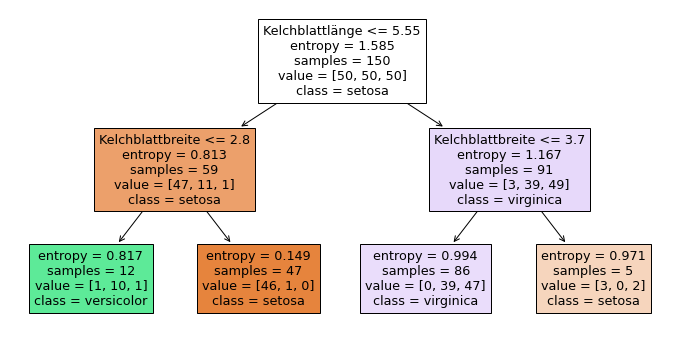

In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X, Y)
plt.figure(figsize=(12,6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In the example, the first decision is made about the sepal length. If it is less than or equal to 5.55, we go to the left side of the tree, if if is greater than 5.55, we go the the right side of the tree. We also see more information in the nodes of the tree. We ignore the entropy for now. Samples are the number of instances during the training, on which this decision was learned. Value are the number of instances of each class within the samples. In the first node (which is also called the root node), we have 150 samples, 50 of each class. The decision tree then just decides on the first class observed in the data, which is Setosa in this case. The data is then partitioned based on the logical rule. 59 instances, 47 of which are Setosa have a sepal length less than or greater to 5.55, 91 instances have a sepal length greater than 5.55, 39 of which are Versicolor, 49 are Virginica. This shows the value of the decision trees: not only do we understand how decisions are made about the features, we also see the effect of the decisions on the data. The nodes on the lowest layer of the tree are called leaf nodes. 

The decision surface of the above tree looks as follows. 